# IPL Data Analysis 2008 - 2019

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sns
mlt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os

print(os.listdir('C:/Users/dell/input'))


['deliveries.csv', 'matches.csv']


In [14]:
matches = pd.read_csv('C:/Users/dell/input/matches.csv')
delivery = pd.read_csv('C:/Users/dell/input/deliveries.csv')

In [22]:
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [23]:
delivery.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [15]:
matches.drop(['umpire3'], axis=1, inplace = True) #all values are NaN
delivery.fillna(0, inplace = True) #filling Nan Values with 0

In [16]:
matches['team1'].unique() #listing all the teams in the league

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [17]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant','Delhi Capitals']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS', 'DCS'],inplace=True)

In [18]:
delivery.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant', 'Delhi Capitals']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS','DCS'],inplace=True)

In [9]:
print('Total Matches Played:', matches.shape[0]) #total matches

Total Matches Played: 756


In [30]:
print('Venues played at: ', matches['city'].unique()) #all the venues where atleast 1 match is played

Venues played at:  ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']


In [34]:
print('Teams:', matches['team1'].unique()) #all the teams 

Teams: ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW'
 'DCS']


In [35]:
print('Total Venues played at:', matches['city'].nunique())

Total Venues played at: 32


In [36]:
print('Total umpires', matches['umpire1'].nunique())

Total umpires 61


In [38]:
print((matches['player_of_match'].value_counts()).idxmax(),' : has most man of the match awards') #most man of the match winning player

CH Gayle  : has most man of the match awards


In [40]:
print('Highest number of match wins -> ', ((matches['winner']).value_counts()).idxmax()) #highest match winning team

Highest number of match wins ->  MI


In [41]:
diff = matches.iloc[[matches['win_by_runs'].idxmax()]] #highest runs difference win
diff[['season', 'team1', 'team2', 'winner', 'win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


MI has defeated DD with the highest run difference that is 146 runs

In [43]:
diff = matches.iloc[[matches['win_by_wickets'].idxmax()]] #highes wickets difference win
diff[['season','team1','team2','winner','win_by_wickets']]

,season,team1,team2,winner,win_by_wickets
2,2017,GL,KKR,KKR,10


KKR has defeated GL with the highest wicket difference that is by 10 wickets

### Toss Analysis

In [44]:
print('Toss Decision in %\n', ((matches['toss_decision']).value_counts())/756*100)

Toss Decision in %
 field    61.243386
bat      38.756614
Name: toss_decision, dtype: float64


Toss Decision across Seasons

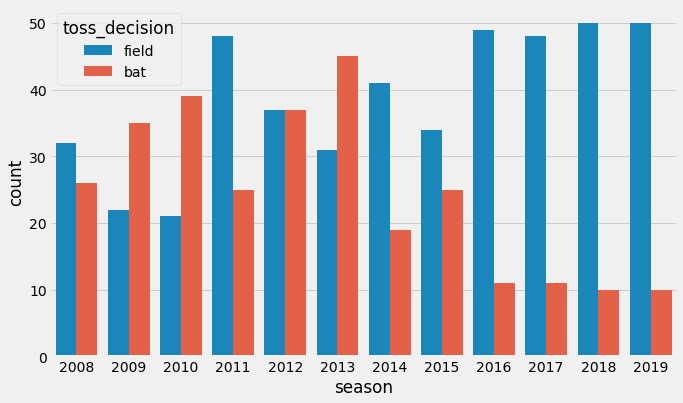

In [47]:
mlt.subplots(figsize = (10,6))
sns.countplot(x='season', hue='toss_decision', data= matches)
mlt.show()

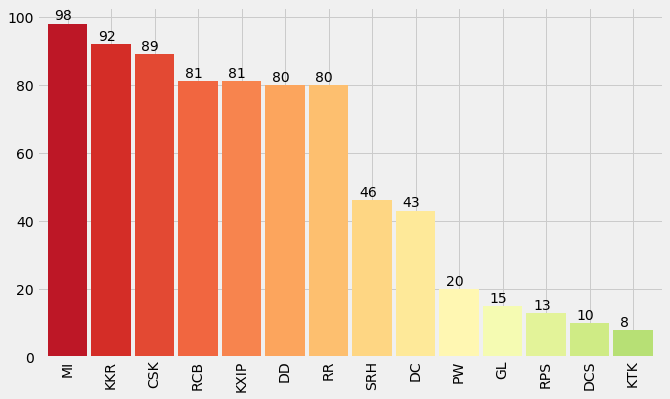

In [48]:
mlt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
mlt.show()

Mumbai Indians have won the most tosses followed by Kolkata Knight Riders. Delhi Capitals which made debut in 2019 season have won 10 tosses. This does not show the higher chances of winning the toss as the number of matches played by each team is uneven

## Total Number of Matches vs Total number of wins for each team

In [49]:
matches_played_byteams=pd.concat([matches['team1'],matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=matches['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)

trace1 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['Total Matches'],
    name='Total Matches'
)
trace2 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['wins'],
    name='Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

## Does Toes decide the match winner?

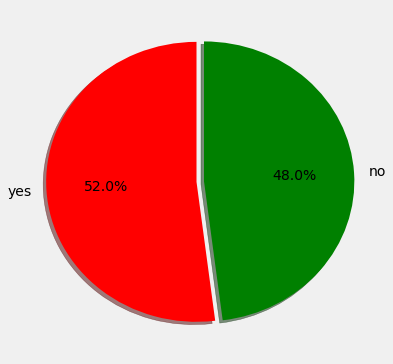

In [51]:
df=matches[matches['toss_winner']==matches['winner']]
slices=[len(df),(756-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

Winning Toss does not necessarily decide the winner of thee match. The probability is almost 50%-50%

## Matches played across each season

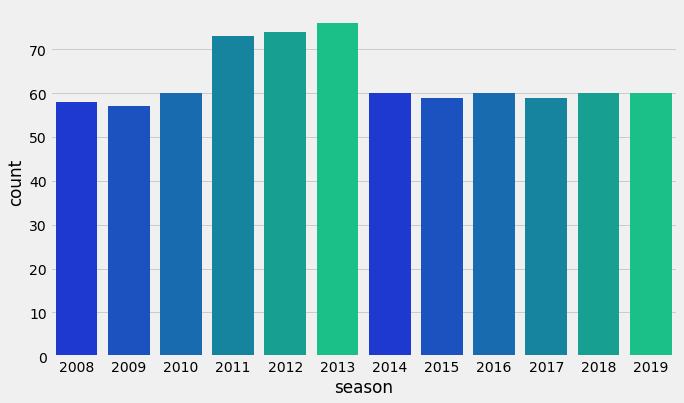

In [52]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches,palette=sns.color_palette('winter'))  #countplot automatically counts the frequency of an item
mlt.show()

Highest number of matches were played in 2013 season.

## Runs Across seasons

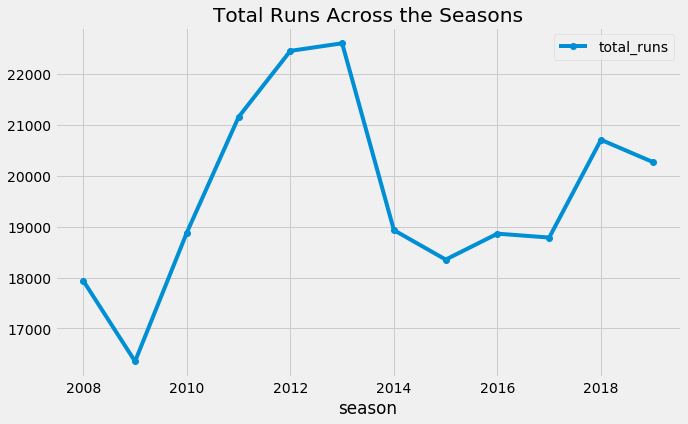

In [53]:
batsmen = matches[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Total Runs Across the Seasons')
mlt.show()

Most runs were scored in 2013 season as most number of matches were also played in this season.First there was a decline in total runs from 2008 season to 2009 season, but in later seasons there was a slump in the total runs.

## Average runs per Match in each season

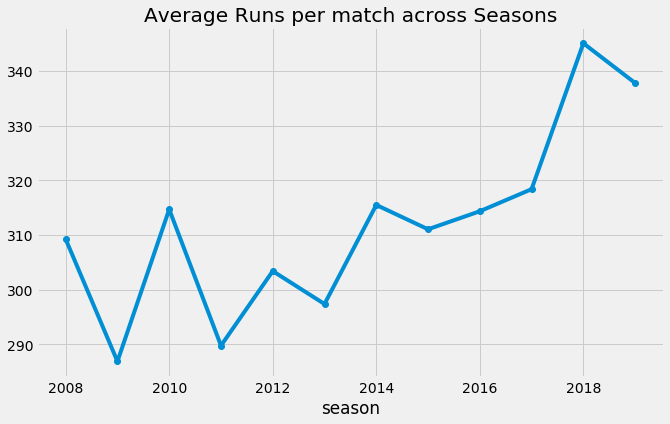

In [54]:
avgruns_each_season=matches.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Average Runs per match across Seasons')
mlt.show()

From the graph it is clear that as the years have progressed and the T20 game is becoming more popular Average runs per game has increased.

## Sixes and Fours per season.

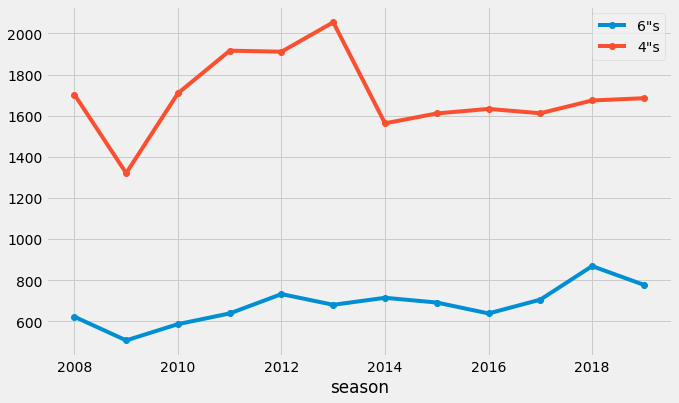

In [55]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()

## Runs per Over by each team across seasons

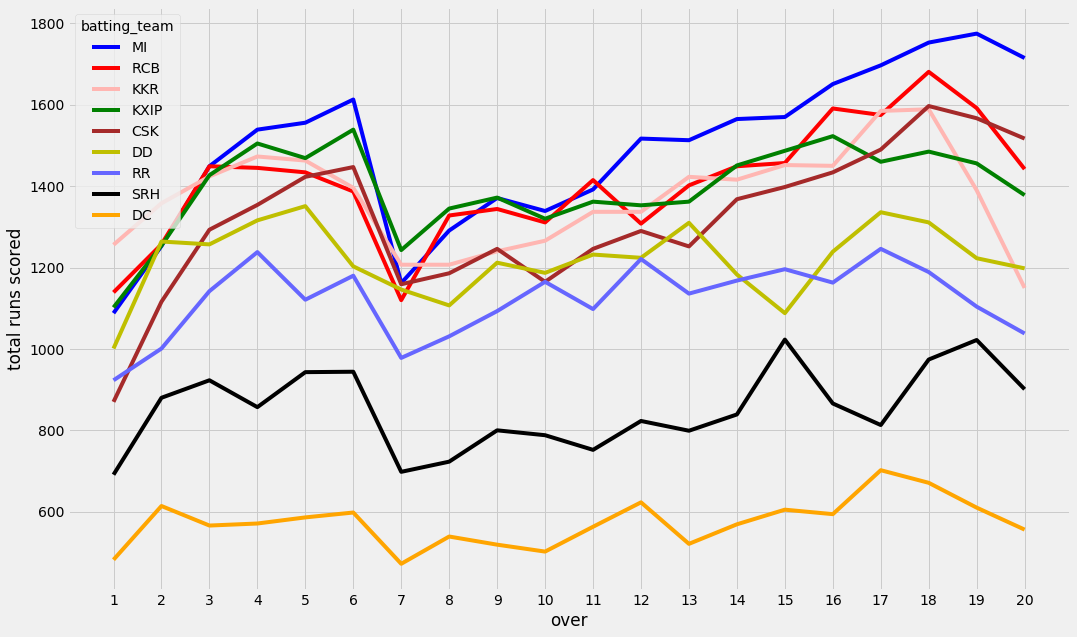

In [56]:
runs_per_over = delivery.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches']>50].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500']) #plotting graphs for teams that have played more than 100 matches
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
mlt.xticks(x)
mlt.ylabel('total runs scored')
fig=mlt.gcf()
fig.set_size_inches(16,10)
mlt.show()

Not all teams have played in all seasons, hence plotting only for teams who have played more than 100 games. 
Maximum runs are being scored in the last 5 overs. MI and RCB have shown an increasing trend in the runs scored throughout the match.

## Favourite Grounds

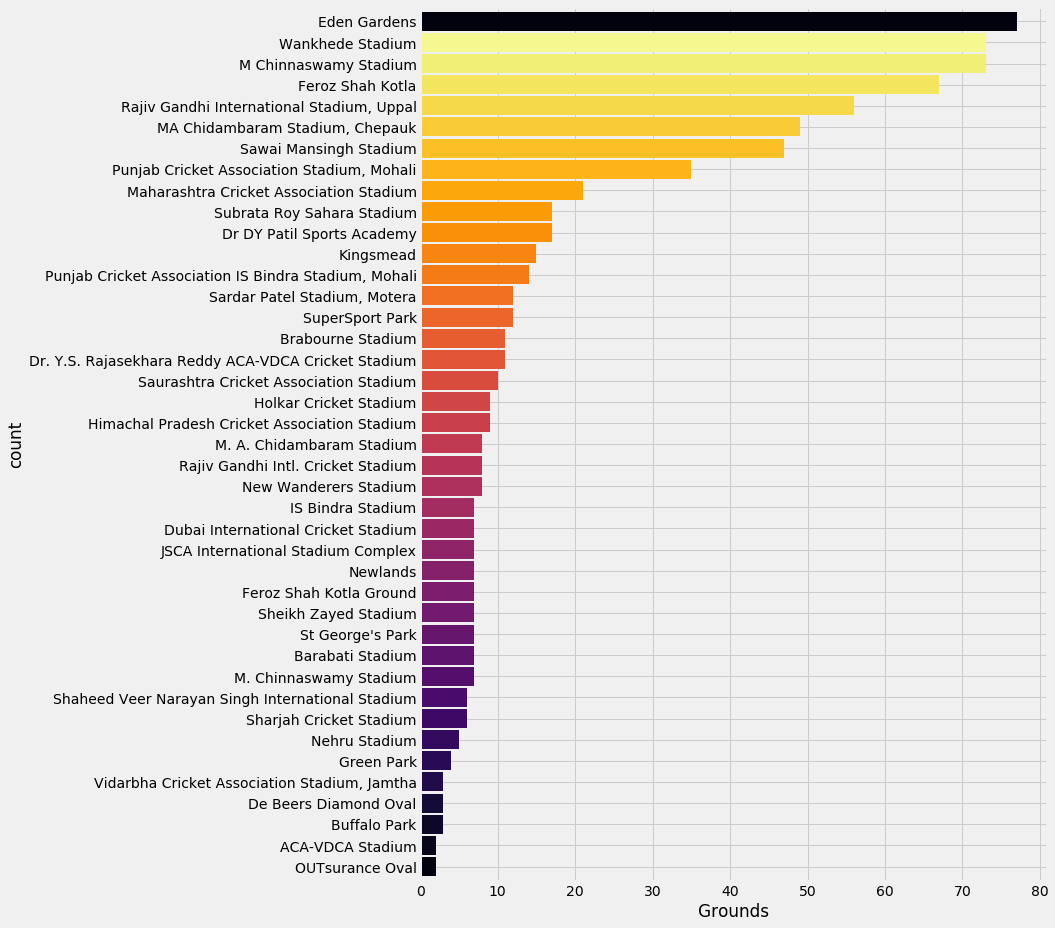

In [57]:
mlt.subplots(figsize=(10,15))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
mlt.show()

Most games have been played at Eden Gardens.

Maximum Man of the Matches

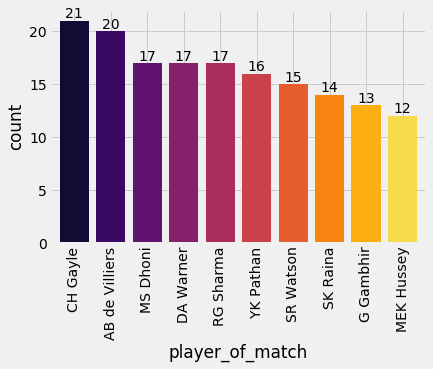

In [58]:
#the code used is very basic but gets the job done easily
ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

There is one award difference between Chris Gayle and AB de Villiers

## Winner by Year

In [60]:
print('Winners By Years')
for i in range(2008,2020):
    df=((matches[matches['season']==i]).iloc[-1]) 
    print(df[[1,10]].values)
#getting the last match in every season since the last match will be the final match for the season

Winners By Years
[2008 'RR']
[2009 'DC']
[2010 'CSK']
[2011 'CSK']
[2012 'KKR']
[2013 'MI']
[2014 'KKR']
[2015 'MI']
[2016 'SRH']
[2017 'MI']
[2018 'CSK']
[2019 'MI']


## Super Over

In [61]:
print('\n Total Matches with Super Overs:',delivery[delivery['is_super_over']==1].match_id.nunique())


 Total Matches with Super Overs: 7


## Teams who have'nt played a super over

In [63]:
teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW', 'DCS']
play=delivery[delivery['is_super_over']==1].batting_team.unique()
play=list(play)
print('Teams who haven"t ever played a super over are:' ,list(set(teams)-set(play)))

Teams who haven"t ever played a super over are: ['DC', 'RPS', 'DCS', 'KTK', 'PW']


## Favorite Umpire

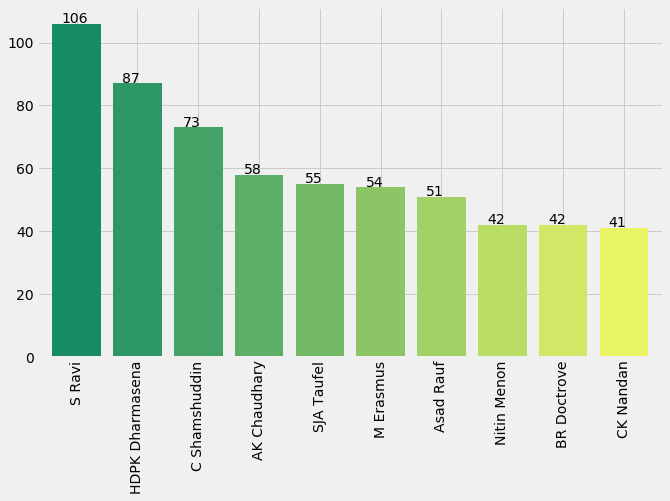

In [64]:
mlt.subplots(figsize=(10,6))
ump=pd.concat([matches['umpire1'],matches['umpire2']]) 
ax=ump.value_counts().head(10).plot.bar(width=0.8,color=sns.color_palette('summer',10))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

## Team1 Vs Team2

### MI Vs KKR

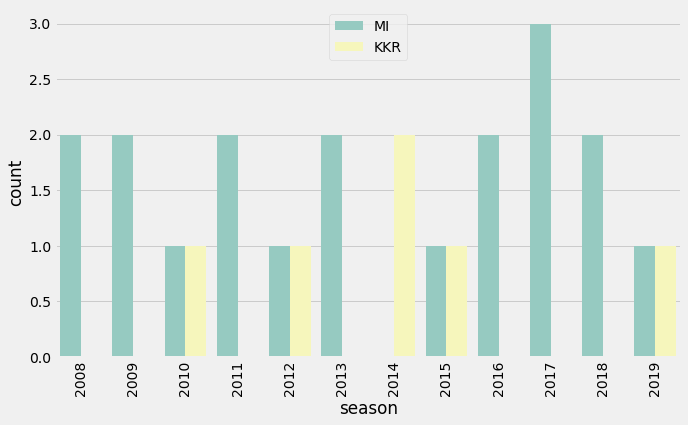

In [65]:
def team1_vs_team2(team1,team2):
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
    sns.countplot(x='season', hue='winner',data=mt1,palette='Set3')
    mlt.xticks(rotation='vertical')
    leg = mlt.legend( loc = 'upper center')
    fig=mlt.gcf()
    fig.set_size_inches(10,6)
    mlt.show()
team1_vs_team2('KKR','MI')

Two matches are to be played between any 2 teams excluding the eliminator games like quarter finals,semi finals and final.    
MI have defeated KKR in 13 out of 18 matches played between them.Only in the year 2014, KKR won both the matches.Thus in a MI vs KKR match, we know on whom should we bet upon.   
MI and KKR have played against each other only once in quarter final in which MI won.   
Similar comparisions can be done between any two teams, we just need to change the team names.

### MI vs CSK

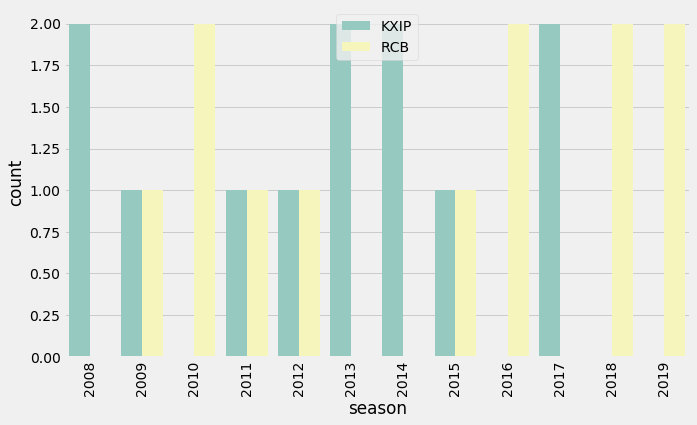

In [71]:
team1_vs_team2('RCB', 'KXIP')

KXIP and RCB have never played against each other in any eliminator game.

## Matches Won By A Team Against Other Teams

In [75]:
def comparator(team1):
    teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW', 'DCS']
    teams.remove(team1)
    opponents=teams.copy()
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))]
    for i in opponents:
        mask = (((mt1['team1']==i)|(mt1['team2']==i)))&((mt1['team1']==team1)|(mt1['team2']==team1))
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T
        print(mt2)
    
comparator('MI')

        MI  KKR
winner  19    6
        MI  RCB
winner  16    9
        MI  DC
winner   6   4
        MI  CSK
winner  17   11
        MI  RR
winner  10  10
        DD  MI
winner  11  11
        GL  MI
winner   2   2
        MI  KXIP
winner  13    11
        SRH  MI
winner    7   7
        RPS  MI
winner    4   2
        KTK
winner    1
        MI  PW
winner   5   1
        DCS  MI
winner    1   1


## Score Distribution For Teams by Innings

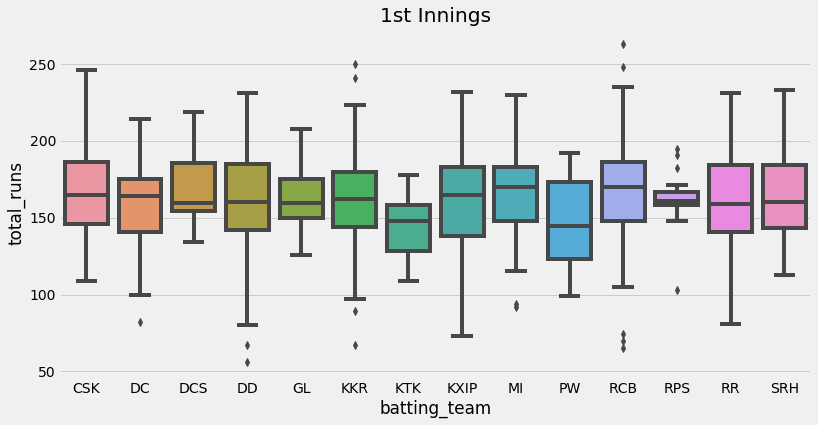

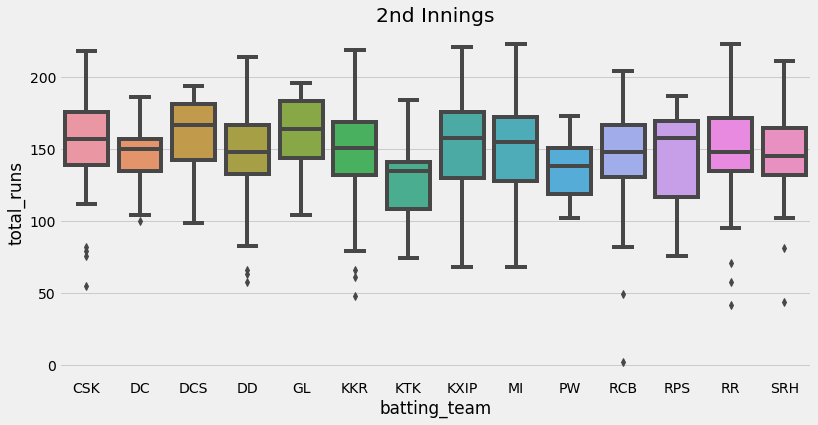

In [76]:
mlt.subplots(figsize=(12,6))
xyz=delivery.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
xyz.drop('match_id',axis=1,inplace=True)
xyz=xyz.sort_values(by=['batting_team','total_runs'],ascending=True)
score_1_inning=xyz[xyz['inning']==1]
score_2_inning=xyz[xyz['inning']==2]
sns.boxplot(x='batting_team',y='total_runs',data=score_1_inning).set_title('1st Innings')
mlt.show()
sns.boxplot(x='batting_team',y='total_runs',data=score_2_inning).set_title('2nd Innings')
fig=mlt.gcf()
fig.set_size_inches(12,6)

According to Graph 1 the batting by CSK in innings 1 looks to be the best. Graph 2 also conveys the same story.
   
In Graph 2 we see a point near 0 which may seem to be outlier. But it is so because the match was disrupted.

## 200+ Scores

In [78]:
high_scores=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores=high_scores[high_scores['total_runs']>=200]
#nlargest is used to sort the given column
high_scores.nlargest(15,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,RCB,PW,263
1370,7937,1,KKR,KXIP,250
1250,620,1,RCB,GL,248
416,206,1,CSK,RR,246
1498,11338,1,KKR,MI,241
122,61,1,CSK,KXIP,240
1134,562,1,RCB,MI,235
1426,11147,1,SRH,RCB,233
596,296,1,KXIP,RCB,232
1500,11339,1,SRH,KXIP,232


Here we have listed top 15 200+ scores 

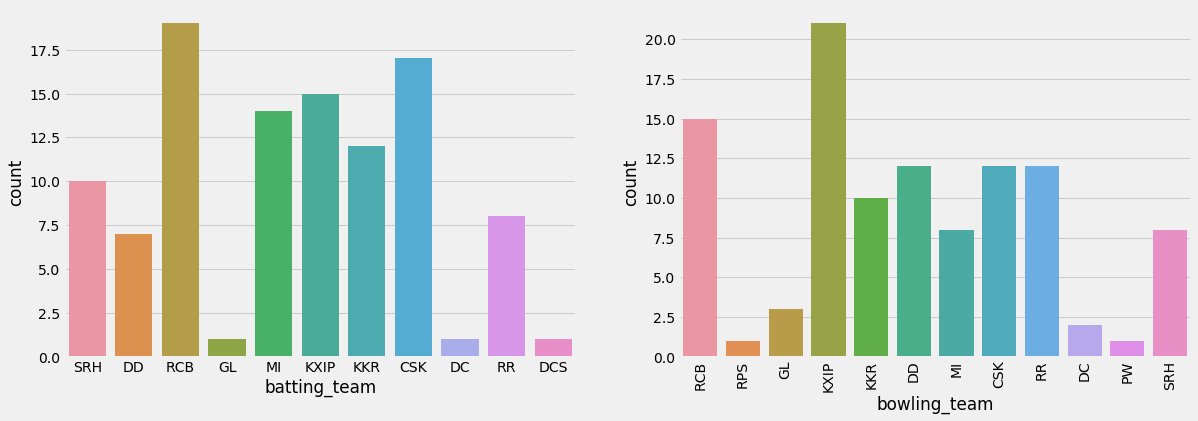

In [79]:
fig, ax =mlt.subplots(1,2)
sns.countplot(high_scores['batting_team'],ax=ax[0])
sns.countplot(high_scores['bowling_team'],ax=ax[1])
mlt.xticks(rotation=90)
fig=mlt.gcf()
fig.set_size_inches(18,6)
mlt.show()

The Graph on the left shows the number of times a team has scored above 200 runs. The graph on the right shows the number of times a bowling team has conceeded above 200 runs.

In [80]:
print('Teams who have"nt ever scored 200 runs',list(set(teams)-set(high_scores['batting_team'])))
print('Teams who haven"t conceeded over 200 while bowling',list(set(teams)-set(high_scores['bowling_team'])))

Teams who have"nt ever scored 200 runs ['PW', 'KTK', 'RPS']
Teams who haven"t conceeded over 200 while bowling ['DCS', 'KTK']


In [81]:
high=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high.set_index(['match_id'],inplace=True)
high['total_runs'].max()
high.columns
high=high.rename(columns={'total_runs':'count'})
high=high[high['count']>=200].groupby(['inning','batting_team','bowling_team']).count()
high

count
inning batting_team bowling_team       
1      CSK          DD                2
                    KKR               1
                    KXIP              2
                    MI                1
                    RCB               1
                    RR                2
                    SRH               2
       DC           RR                1
       DCS          MI                1
       DD           KKR               1
                    KXIP              1
                    MI                1
                    RPS               1
                    RR                1
       GL           DD                1
       KKR          CSK               1
                    DC                1
                    DD                1
                    KXIP              4
                    MI                1
                    RCB               1
       KXIP         CSK               2
                    MI                2
                    RCB               2
                    RR                2
                    SRH               1
       MI           CSK               1
                    DD                5
                    KKR               1
                    RCB               2
...                                 ...
       RR           KXIP              1
                    RCB               1
                    SRH               1
       SRH          KKR               1
                    KXIP              3
                    RCB               3
                    RR                1
2      CSK          KKR               1
                    KXIP              2
                    RCB               2
                    RR                1
       DD           CSK               1
                    GL                1
       KKR          KXIP              1
                    RCB               2
       KXIP         CSK               2
                    DD                1
                    KKR               2
                    SRH               1
       MI           CSK               1
                    KKR               1
                    KXIP              2
       RCB          KXIP              1
                    RR                1
                    SRH               1
       RR           CSK               1
                    DC                1
                    MI                1
       SRH          RCB               1
                    RR                1

[72 rows x 1 columns]

The above dataframe shows the number of times a team has scored above 200 runs against another team.

In [83]:
high_scores=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores1=high_scores[high_scores['inning']==1]
high_scores2=high_scores[high_scores['inning']==2]
high_scores1=high_scores1.merge(high_scores2[['match_id','inning', 'total_runs']], on='match_id')
high_scores1.rename(columns={'inning_x':'inning_1','inning_y':'inning_2','total_runs_x':'inning1_runs','total_runs_y':'inning2_runs'},inplace=True)
high_scores1=high_scores1[high_scores1['inning1_runs']>=200]
high_scores1['is_score_chased']=1
high_scores1['is_score_chased'] = np.where(high_scores1['inning1_runs']<=high_scores1['inning2_runs'], 
                                           'yes', 'no')
high_scores1.head()

,match_id,inning_1,batting_team,bowling_team,inning1_runs,inning_2,inning2_runs,is_score_chased
0,1,1,SRH,RCB,207,2,172,no
8,9,1,DD,RPS,205,2,108,no
19,20,1,RCB,GL,213,2,192,no
31,32,1,SRH,KXIP,207,2,181,no
35,36,1,SRH,KKR,209,2,161,no


## Chances of chasing 200+ target

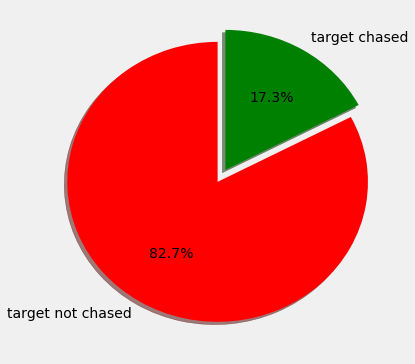

In [86]:
slices=high_scores1['is_score_chased'].value_counts().reset_index().is_score_chased
list(slices)
labels=['target not chased','target chased']
mlt.pie(slices,labels=labels,colors=['red', 'green'],startangle=90,shadow=True,explode=(0,0.1),autopct='%1.1f%%')
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

It seems to be clear that team batting first and scoring 200+ runs, has a very high probability of winning the match.

## Comparison between Batsman

Here I have created a function that compares 2 batsman based on their respective stats like runs or strike rate etc. First lets create a dataframe from where we will be taking all that values for comparison. 

In [87]:
balls=delivery.groupby(['batsman'])['ball'].count().reset_index()
runs=delivery.groupby(['batsman'])['batsman_runs'].sum().reset_index()
balls=balls.merge(runs,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball':'ball_x','batsman_runs':'ball_y'},axis=1,inplace=True)
sixes=delivery.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=delivery.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
balls['strike_rate']=balls['ball_y']/balls['ball_x']*100
balls=balls.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
balls=balls.merge(fours,left_on='batsman',right_on='batsman',how='outer')
compare=delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
compare=compare.groupby(['batsman','batting_team'])['batsman_runs'].max().reset_index()
balls=balls.merge(compare,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball_x':'balls','ball_y':'runs','batsman_runs_x':"6's",'batsman_runs_y':"4's",'batting_team':'Team','batsman_runs':'Highest_score'},axis=1,inplace=True)
balls.head()

,batsman,balls,runs,strike_rate,6's,4's,Team,Highest_score
0,A Ashish Reddy,196,280,142.857143,16,15,DC,10
1,A Ashish Reddy,196,280,142.857143,16,15,SRH,36
2,A Chandila,7,4,57.142857,0,0,RR,4
3,A Chopra,75,53,70.666667,7,0,KKR,24
4,A Choudhary,20,25,125.000000,1,1,RCB,15


Now using this dataframe, we can compare stats like the strike rate, or the number of 6's for 4's etc. We will be passing the names of 2 batsmen and two comparing measures for the comparision.

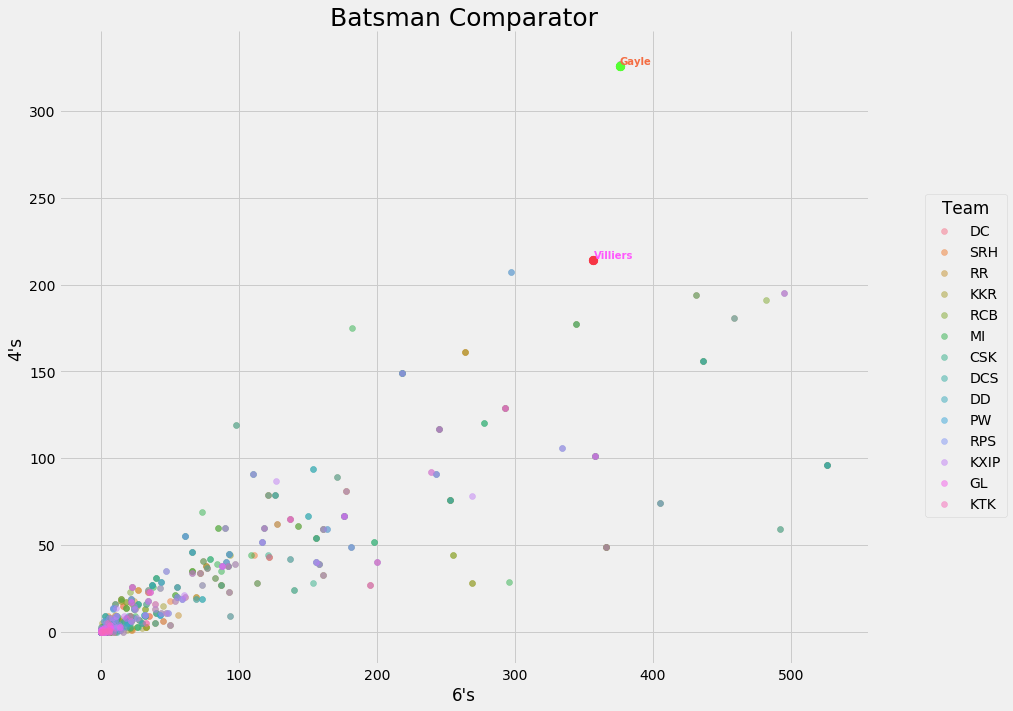

In [88]:
def batsman_comparator(stat1,stat2,batsman1,batsman2):
    sns.FacetGrid(balls,hue='Team',size=8).map(mlt.scatter, stat1,stat2, alpha=0.5).add_legend()
    bats1=balls[balls['batsman'].str.contains(batsman1)].sort_values(by=stat1,ascending=False)
    bats2=balls[balls['batsman'].str.contains(batsman2)].sort_values(by=stat1,ascending=False)
    mlt.scatter(bats1[stat1],bats1[stat2]-1,s=75,c='#55ff33')
    mlt.text(x=bats1[stat1].values[0],y=bats1[stat2].values[0],s=batsman1,
            fontsize=10, weight='bold', color='#f46d43')
    mlt.scatter(bats2[stat1],bats2[stat2],s=75,c='#f73545')
    mlt.text(x=bats2[stat1].values[0],y=bats2[stat2].values[0]+1,s=batsman2, 
            fontsize=10, weight='bold', color='#ff58fd')
    mlt.gcf().set_size_inches(15,10)
    mlt.title('Batsman Comparator',size=25)
    mlt.show()

batsman_comparator("6's","4's",'Gayle','Villiers') #comparing gayle and de-villiers based on their respective boundaries

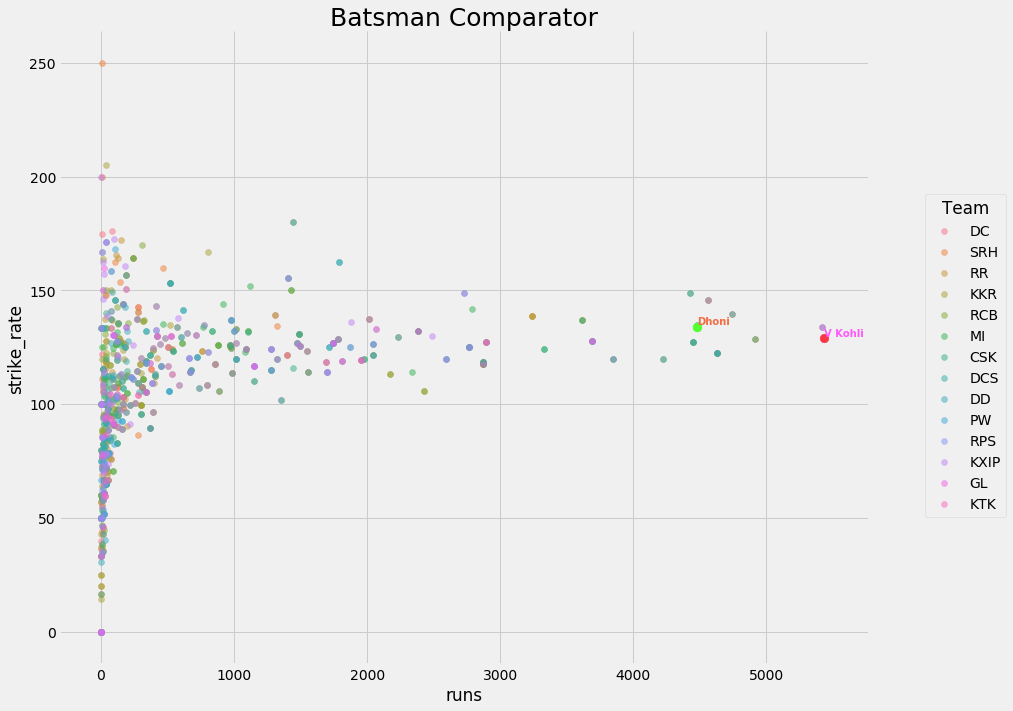

In [89]:
batsman_comparator("runs", "strike_rate", "Dhoni", "V Kohli")

Top 10 Batsman

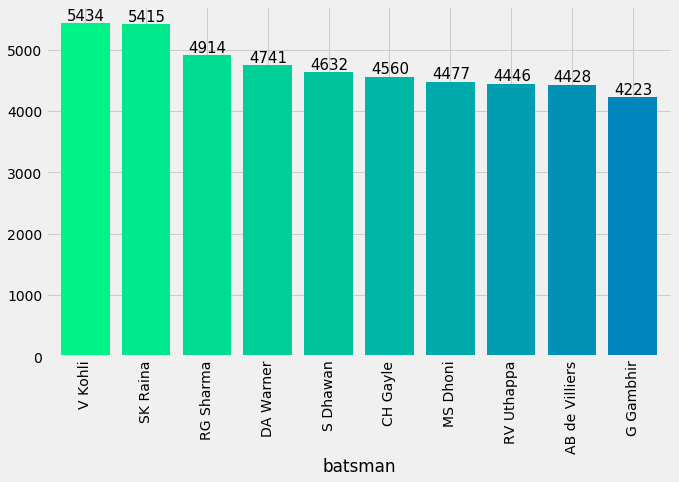

In [90]:
mlt.subplots(figsize=(10,6))
max_runs=delivery.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
mlt.show()

Virat Konli has the highest runs so far and Suresh Raina is just behind him with a difference of 19 runs.

## Batsman who have scored maximum 1's,2's,4's and 6's

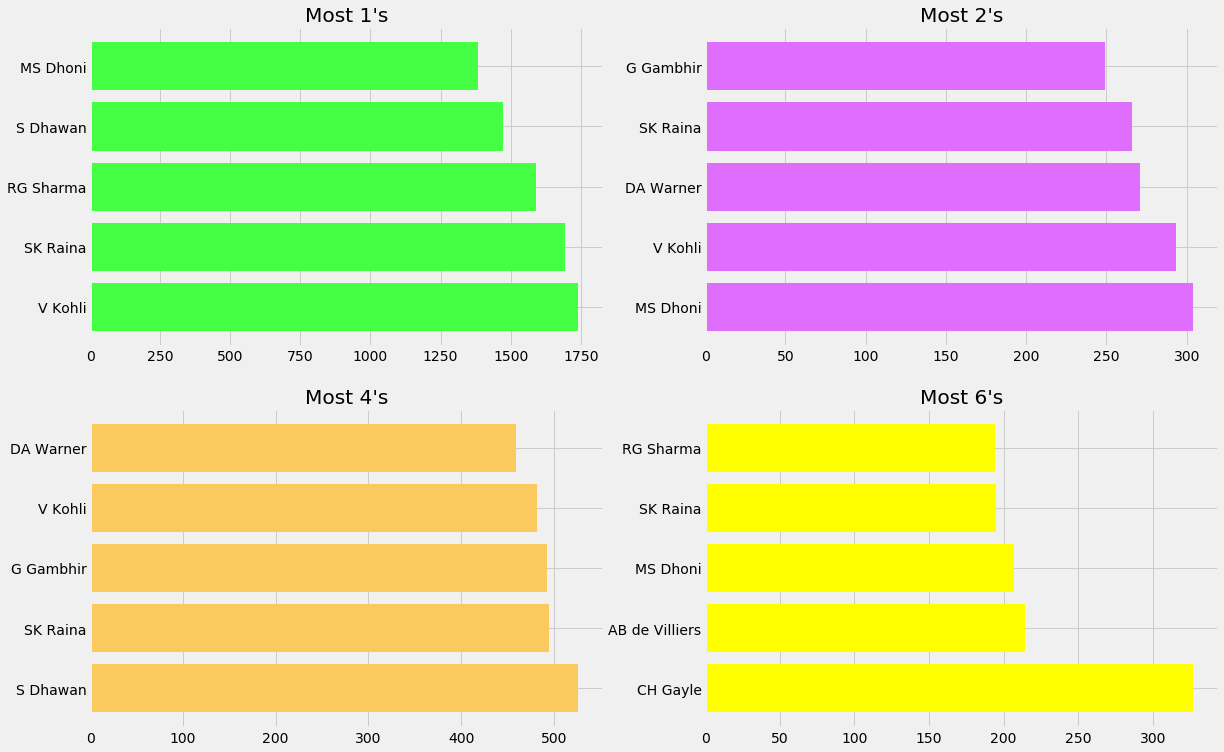

In [91]:
toppers=delivery.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
fig,ax=mlt.subplots(2,2,figsize=(18,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
mlt.show()

Virat Kohli has scored the maximum 1's   
Dhoni has scored maximum 2's   
Shikhar Dhawan has maximum 4's   
Chris Gayle has maximum 6's   

## Top Individual Scores

In [92]:
top_scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
#top_scores=top_scores[top_scores['batsman_runs']>100]
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
10149,7935,RR Pant,DD,130
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
10417,7953,SR Watson,CSK,121


## Individual Scores By Top Batsman each Inning

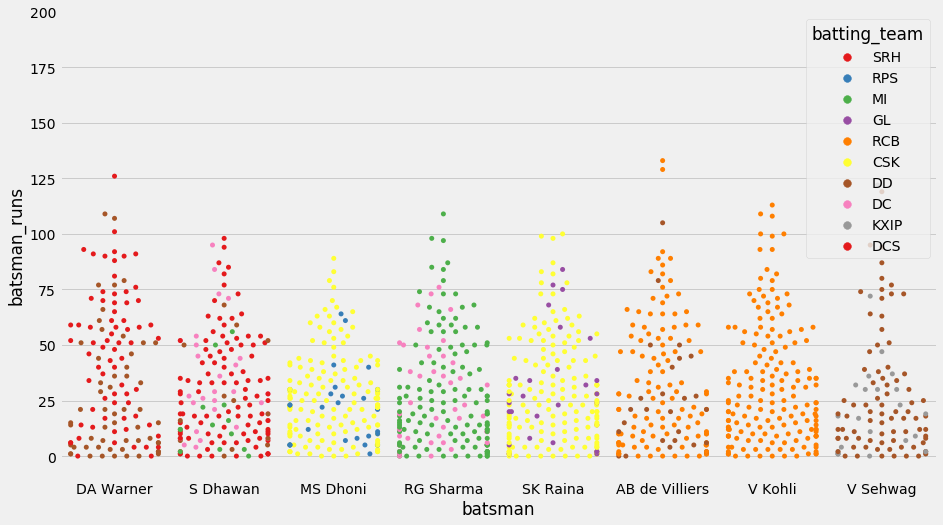

In [94]:
swarm=['S Dhawan','V Kohli','V Sehwag','SK Raina','RG Sharma','MS Dhoni','AB de Villiers','DA Warner']
scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
scores=scores[top_scores['batsman'].isin(swarm)]
sns.swarmplot(x='batsman',y='batsman_runs',data=scores,hue='batting_team',palette='Set1')
fig=mlt.gcf()
fig.set_size_inches(14,8)
mlt.ylim(-10,200)
mlt.show()

Ms Dhoni and Shikhar Dhawan have never scored a century, although Shikhar dhawan was very close to getting a century.    
V Kholi has played for only 1 team since 2008

## Runs Scored By Batsman Across Seasons

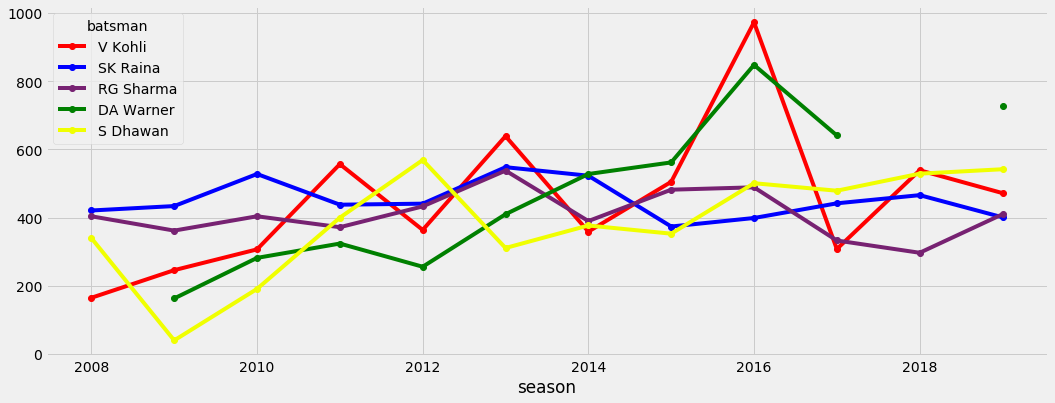

In [95]:
a=batsmen.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
a=a.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
a['Total']=a.sum(axis=1)
a=a.sort_values(by='Total',ascending=0)[:5]
a.drop('Total',axis=1,inplace=True)
a.T.plot(color=['red','blue','#772272','green','#f0ff00'],marker='o')
fig=mlt.gcf()
fig.set_size_inches(16,6)
mlt.show()

David Warner's form looks very impressive but could not play IPL in 2018.   
Kohli's performance has seen a sharp decline after 2016 season.

## How do top batsmen score?

In [96]:
a=batsmen.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
b=max_runs.sort_values(ascending=False)[:10].reset_index()
c=b.merge(a,left_on='batsman',right_on='batsman',how='left')
c.drop('batsman_runs_x',axis=1,inplace=True)
c.set_index('batsman',inplace=True)
c.columns=['type','count']
c=c[(c['type']==1)|(c['type']==2)|(c['type']==4)|(c['type']==6)]
cols=['type','count']
c.reset_index(inplace=True)
c=c.pivot('batsman','type','count')

trace1 = go.Bar(
    y=c.index, x=c[6],
    name="6's",
    orientation = 'h',
    marker = dict(color = 'rgba(178, 78, 139, 0.6)',
        line = dict(color = 'rgba(178, 78, 139, 1.0)',
            width = 3)
    )
)
trace2 = go.Bar(
    y=c.index, x=c[4],
    name="4's",
    orientation = 'h',
    marker = dict(color = 'rgba(58, 71, 80, 0.6)',
        line = dict(color = 'rgba(58, 71, 80, 1.0)',
            width = 3)
    )
)

trace3 = go.Bar(
    y=c.index, x=c[2],
    name="2's",
    orientation = 'h',
    marker = dict(color = 'rgba(101, 178, 139, 0.6)',
        line = dict(color = 'rgba(101, 178, 139, 1.0)',
            width = 3)
    )
)
trace4 = go.Bar(
    y=c.index, x=c[1],
    name="1's",
    orientation = 'h',
    marker = dict(color = 'rgba(208, 105, 80, 0.6)',
        line = dict(color = 'rgba(208, 105, 80, 1.0)',
            width = 3)
    )
)

data = [trace1, trace2,trace3,trace4]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='marker-h-bar')

## Frequency of Scores

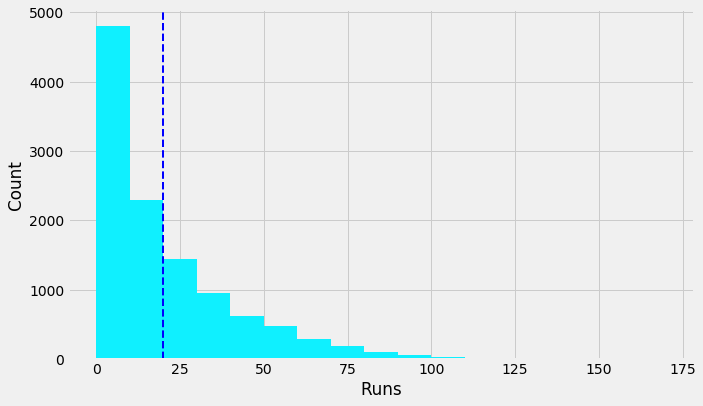

In [97]:
mlt.subplots(figsize=(10,6))
bins=range(0,180,10)
mlt.hist(top_scores["batsman_runs"],bins,histtype="bar",rwidth=1.2,color='#0ff0ff')
mlt.xlabel('Runs')
mlt.ylabel('Count')
mlt.axvline(top_scores["batsman_runs"].mean(), color='b', linestyle='dashed', linewidth=2)
mlt.plot()
mlt.show()

The average score for a batsman is around 19-20. Also the number of single digit score is quite high and the number of centuries is low.

## Orange Caps Each Season(Highest Run Getter per Season)

In [98]:
orange=matches[['id','season']]
orange=orange.merge(delivery,left_on='id',right_on='match_id',how='left')
orange=orange.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
orange=orange.sort_values('batsman_runs',ascending=0)
orange=orange.drop_duplicates(subset=["season"],keep="first")
orange.sort_values(by='season')

trace1 = go.Bar(
    x=orange['season'].values,
    y=orange['batsman_runs'].values,
    name='Total Matches',
    text=orange['batsman'].values,
    marker=dict(
        color='rgb(255,140,0)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=1
)


layout = go.Layout(
    title='Orange-Cap Holders',
)
data=[trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

## Top Bowlers

Highest Wicket Takers

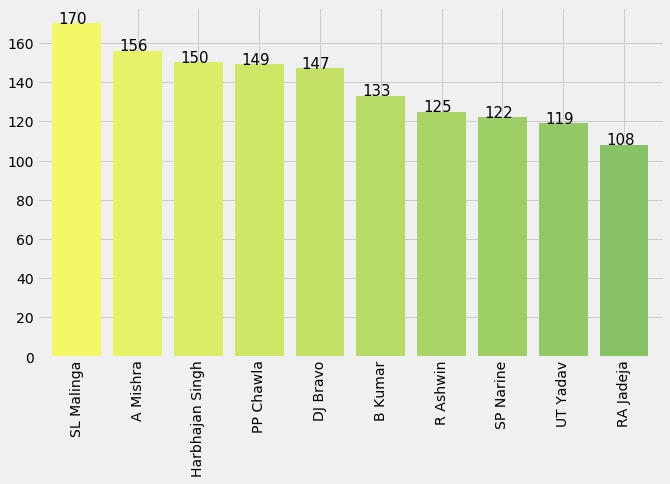

In [99]:
mlt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
ct=delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color=sns.color_palette('summer_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()),fontsize=15)
mlt.show()

Lastith Malinga is highest wicket taker in league. 

## Maximum Overs

In [100]:
eco=delivery.groupby(['bowler']).sum()
eco['total balls']=delivery['bowler'].value_counts()
eco['overs']=(eco['total balls']//6)
eco[eco['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(5).reset_index()

,bowler,overs
0,Harbhajan Singh,575
1,A Mishra,528
2,PP Chawla,526
3,R Ashwin,502
4,SL Malinga,495


Harbhajan Singh has bowled the most overs followed by Amit Mishra

## Most Economical Bowlers with 300+ overs

In [101]:
eco['economy']=(eco['total_runs']/(eco['overs']))
eco[(eco['overs']>300)].sort_values('economy')[:10].economy.reset_index().T

,0,1,2,3,4,5,6,7,8,9
bowler,DW Steyn,R Ashwin,SP Narine,Harbhajan Singh,SL Malinga,B Kumar,A Mishra,PP Ojha,Z Khan,P Kumar
economy,6.68665,6.75498,6.78753,7.04348,7.09293,7.23725,7.29167,7.40432,7.54617,7.61276


## Top 20 Bowlers

In [11]:
bowlers=delivery.groupby('bowler').sum().reset_index()
bowl=delivery['bowler'].value_counts().reset_index()
bowlers=bowlers.merge(bowl,left_on='bowler',right_on='index',how='left')
bowlers=bowlers[['bowler_x','total_runs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','total_runs':'runs_given','bowler_y':'balls'},axis=1,inplace=True)
bowlers['overs']=(bowlers['balls']//6)
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
ct=delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
ct=ct['bowler'].value_counts()[:20].reset_index()
bowlers=bowlers.merge(ct,left_on='bowler',right_on='index',how='left').dropna()
bowlers=bowlers[['bowler_x','runs_given','overs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','bowler_y':'wickets'},axis=1,inplace=True)
bowlers['economy']=(bowlers['runs_given']/bowlers['overs'])
bowlers.head()

,bowler,runs_given,overs,wickets,economy
7,A Mishra,3850,528,156.0,7.291667
9,A Nehra,2537,329,106.0,7.711246
53,B Kumar,3264,451,133.0,7.237251
93,DJ Bravo,3733,451,147.0,8.277162
108,DW Steyn,2454,367,96.0,6.686649


In [12]:
trace = go.Scatter(
    y = bowlers['wickets'],
    x = bowlers['bowler'],
    mode='markers',
    marker=dict(
        size= bowlers['wickets'].values,
        color = bowlers['economy'].values,
        colorscale='Portland',
        showscale=True,
        colorbar = dict(title = 'Economy'),
    ),
    text = bowlers['overs'].values
)
data = [(trace)]

layout= go.Layout(
    autosize= True,
    title= 'Top 20 Wicket Taking Bowlers',
    hovermode= 'closest',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        title='Bowlers'
    ),
    yaxis=dict(
        title= 'Wickets Taken',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

## Highest Dismissals for a Batsman by a Bowler

In [104]:
gayle=delivery[delivery['batsman']=='CH Gayle']
gayle=gayle[gayle['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
gayle=gayle.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
gayle['batsman']='CH Gayle'

kohli=delivery[delivery['batsman']=='V Kohli']
kohli=kohli[kohli['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
kohli=kohli.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
kohli['batsman']='V Kohli'


raina=delivery[delivery['batsman']=='SK Raina']
raina=raina[raina['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
raina=raina.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
raina['batsman']='SK Raina'

abd=delivery[delivery['batsman']=='AB de Villiers']
abd=abd[abd['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
abd=abd.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
abd['batsman']='AB de Villiers'

msd=delivery[delivery['batsman']=='MS Dhoni']
msd=msd[msd['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
msd=msd.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
msd['batsman']='MS Dhoni'


gg=delivery[delivery['batsman']=='G Gambhir']
gg=gg[gg['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
gg=gg.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
gg['batsman']='G Gambhir'

rohit=delivery[delivery['batsman']=='RG Sharma']
rohit=rohit[rohit['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
rohit=rohit.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
rohit['batsman']='RG Sharma'

uthapa=delivery[delivery['batsman']=='RV Uthappa']
uthapa=uthapa[uthapa['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
uthapa=uthapa.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
uthapa['batsman']='RV Uthappa'

dhawan=delivery[delivery['batsman']=='S Dhawan']
dhawan=dhawan[dhawan['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
dhawan=dhawan.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
dhawan['batsman']='S Dhawan'

warn=delivery[delivery['batsman']=='DA Warner']
warn=warn[warn['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
warn=warn.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
warn['batsman']='DA Warner'

new = gayle.append([kohli,raina,abd,msd,gg,rohit,uthapa,dhawan,warn])
new = new[['batsman','bowler','dismissal_kind']]
new.columns=['batsman','bowler','No_of_Dismissals']
new

,batsman,bowler,No_of_Dismissals
0,CH Gayle,Harbhajan Singh,5
0,V Kohli,A Nehra,6
0,SK Raina,Harbhajan Singh,5
0,AB de Villiers,KH Pandya,4
0,MS Dhoni,Z Khan,7
0,G Gambhir,Z Khan,6
0,RG Sharma,SP Narine,6
0,RV Uthappa,R Ashwin,6
0,S Dhawan,Z Khan,4
0,DA Warner,Harbhajan Singh,4


## Frequency of economy

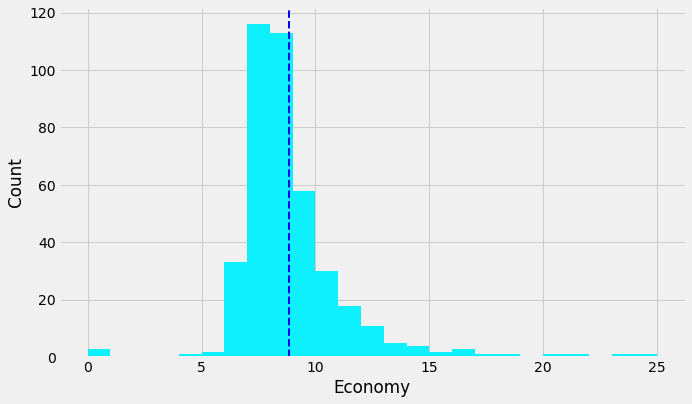

In [105]:
mlt.subplots(figsize=(10,6))
eco.replace([np.inf, -np.inf], np.nan,inplace=True)
eco.fillna(0,inplace=True)
bins=range(0,26)
mlt.hist(eco['economy'],bins,histtype="bar",rwidth=1.2,color='#0ff0ff')
mlt.xlabel('Economy')
mlt.ylabel('Count')
mlt.axvline(eco["economy"].mean(), color='b', linestyle='dashed', linewidth=2)
mlt.plot()
mlt.show()

The average economy rate is between 8.5 to 9

## Purple Caps Each Season (Maximum Wickets By Bowler per Season)

In [106]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
purple=delivery[delivery["dismissal_kind"].isin(dismissal_kinds)]
purple=purple.merge(matches,left_on='match_id',right_on='id',how='outer')
purple=purple.groupby(['season','bowler'])['dismissal_kind'].count().reset_index()
purple=purple.sort_values('dismissal_kind',ascending=False)
purple=purple.drop_duplicates('season',keep='first').sort_values(by='season')
purple.rename({'dismissal_kind':'count_wickets'},axis=1,inplace=True)

trace1 = go.Bar(
    x=purple['season'].values,
    y=purple['count_wickets'].values,
    name='Total Matches',
    text=purple['bowler'].values,
    marker=dict(
        color='rgb(75,0,130)',
        line=dict(
            color='rgb(108,148,107)',
            width=1.5,
        )
    ),
    opacity=1
)


layout = go.Layout(
    title='Purple-Cap Holders',
)
data=[trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

## Teams with Maximum Boundaries

In [109]:
ax=delivery[delivery['batsman_runs']==6].batting_team.value_counts().reset_index()
ax2=delivery[delivery['batsman_runs']==4].batting_team.value_counts().reset_index()
ax=ax.merge(ax2,left_on='index',right_on='index',how='left')
ax.rename({'index':'team','batting_team_x':"6's",'batting_team_y':"4's"},axis=1,inplace=True)

trace1 = go.Bar(
    x=ax.team.values, y=ax["6's"],
    name="6's",
    orientation = 'v',
    marker = dict(color = 'rgba(204,12,28, 0.6)',
        line = dict(color = 'rgba(204,12,28, 0.6)',
            width = 3)
    )
)
trace2 = go.Bar(
    x=ax.team.values, y=ax["4's"],
    name="4's",
    orientation = 'v',
    marker = dict(color = 'rgba(9,234,227, 0.6)',
        line = dict(color = 'rgba(9, 227, 227, 1.0)',
            width = 3)
    )
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='marker-h-bar')

RCB has the highest sixes but MI leads the table when it comes to hitting 4's

## Finals...

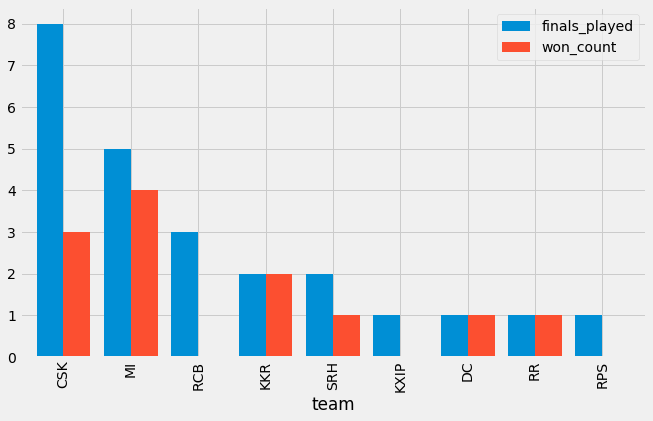

In [114]:
finals=matches.drop_duplicates(subset=['season'],keep='last')
finals=finals[['id','season','city','team1','team2','toss_winner','toss_decision','winner']]
most_finals=pd.concat([finals['team1'],finals['team2']]).value_counts().reset_index()
most_finals.rename({'index':'team',0:'count'},axis=1,inplace=True)
xyz=finals['winner'].value_counts().reset_index()
most_finals=most_finals.merge(xyz,left_on='team',right_on='index',how='outer')
most_finals=most_finals.replace(np.NaN,0)
most_finals.drop('index',axis=1,inplace=True)
most_finals.set_index('team',inplace=True)
most_finals.rename({'count':'finals_played','winner':'won_count'},inplace=True,axis=1)
most_finals.plot.bar(width=0.8)
mlt.gcf().set_size_inches(10,6)
mlt.show()


CSK has been in a final for 8 times but their performance is final is good as we see they have won just 3 times   
MI on the other hand have performed so well in final that they have lost just once in final.   
RCB despite playing 3 finals has failed to win the final.

## Do Toss Winners win Finals???

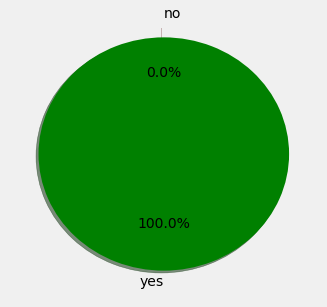

In [115]:
df=finals[finals['toss_winner']==finals['winner']]
slices=[len(finals),(9-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,colors=['G','R'],explode=(0,0.1),autopct='%1.1f%%')
fig = mlt.gcf()
fig.set_size_inches(5,5)
mlt.show()

100% !!! Wow.. Any team who wins the toss in the final wins the title.

## Batting Or Fielding For Toss Winners

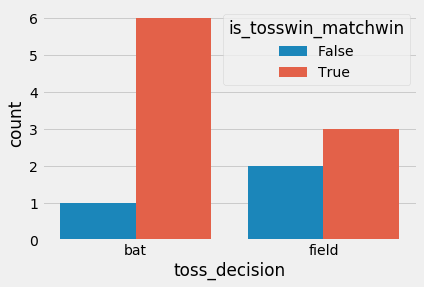

In [116]:
finals['is_tosswin_matchwin']=finals['toss_winner']==finals['winner']
sns.countplot(x='toss_decision',hue='is_tosswin_matchwin',data=finals)
mlt.show()

After winning the toss, team should opt for batting as we see here that batting has proved to be match winning 5 ot of 6 times